In [249]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Gather Data

### Twitter Archive

In [250]:
archive = pd.read_csv("data/twitter-archive-enhanced.csv")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Predictions Data

In [251]:
predictions = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", sep="\t")
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### API Data

In [252]:
%%script false 

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

#### Data to collect:

* Retweet count
* Favorite ("like") count
* Hashtags


* Followers at time of tweet; interesting to see follower gain or loss post-tweet (turns out only current, not historical)
* Number of replies to tweet (turns out that not available; https://twittercommunity.com/t/reply-count/78367/13)

In [253]:
tweet_json = []

# read in the json file line by line into a list
with open("data/tweet_json.txt") as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [254]:
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [255]:
# create a data frame containing the relevant api data
api_data = pd.DataFrame({'tweet_id': [i["id_str"] for i in tweet_json], 
     'retweet_count': [i["retweet_count"] for i in tweet_json], 
     'favorite_count': [i["favorite_count"] for i in tweet_json], 
     'hashtags': [i["entities"]["hashtags"] for i in tweet_json]})

# Assess Data 1

In [256]:
archive_clean = archive.copy()
api_data_clean = api_data.copy()
predictions_clean = predictions.copy()

In [257]:
archive_clean.head(10)
# archive_clean.info()

# archive_clean.doggo.value_counts()
# archive_clean.floofer.value_counts()
# archive_clean.pupper.value_counts()
# archive_clean.puppo.value_counts()

## some tweets use more than one of these words - columns shouldn't be gathered
# archive_clean[(archive_clean[["doggo","floofer","pupper","puppo"]]!="None").sum(axis=1)>1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [258]:
api_data_clean.head(10)
# api_data_clean.info()

,tweet_id,retweet_count,favorite_count,hashtags
0,892420643555336193,8853,39467,[]
1,892177421306343426,6514,33819,[]
2,891815181378084864,4328,25461,[]
3,891689557279858688,8964,42908,[]
4,891327558926688256,9774,41048,"[{'text': 'BarkWeek', 'indices': [129, 138]}]"
5,891087950875897856,3261,20562,"[{'text': 'BarkWeek', 'indices': [129, 138]}]"
6,890971913173991426,2158,12041,[]
7,890729181411237888,16716,56848,[]
8,890609185150312448,4429,28226,"[{'text': 'BarkWeek', 'indices': [113, 122]}]"
9,890240255349198849,7711,32467,[]


In [259]:
predictions_clean.head(10)
# predictions_clean.info()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Quality Issues:

##### `archive` and `api` data
* both datasets still contain non-original tweets and tweets without images

##### More quality issues should become more apparent after data tidied; currently difficult to assess.

#### Tidiness Issues:

##### `archive` data
* columns on retweet status are not useful after retweets are removed, and should be removed
* time of day tweet sent difficult to analyze, as not in own column
* `api` data separate
* `expanded_urls` sometimes contains multiple urls, which in at least some cases are identical
* after non-original tweets are removed, several columns will not contain any data

##### `api` data
* `hashtags` column contains multiple hashtags

# Clean Data 1

## Quality

### `archive` and `api` data

**`archive` dataset still contains non-original tweets and tweets without images**

##### Describe

Remove all retweets and tweets without images, so that they do not end up in further created tables, etc.

##### Code

In [260]:
# keep only tweets that are not retweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# tweets without expanded url's don't have images
archive_clean = archive_clean[~archive_clean.expanded_urls.isnull()]

##### Test

In [261]:
# archive_clean.info()
archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
470,816816676327063552,NaN,NaN,2017-01-05 01:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timber. He misses Christmas. Specifica...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816816676...,12,10,Timber,None,None,None,None
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,None,None,None,None
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,None,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,None,None,puppo
1177,719704490224398336,NaN,NaN,2016-04-12 01:51:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,None,None,pupper,None
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None
1218,714957620017307648,NaN,NaN,2016-03-29 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,None,None,None,None


**`api` dataset still contains non-original tweets and tweets without images**

##### Describe

Join api data to archive data, to ensure that it does not contain retweets or tweets without images, which otherwise could end up in further created tables.

##### Code

In [262]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')

archive_clean = archive_clean.merge(api_data_clean, on="tweet_id", how="left")

##### Test

In [263]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
retweet_count                 2117 no

## Tidiness

### `archive` data

**Time of day tweet sent difficult to analyze, as not in own column**

##### Define

Create separate column for time, to make it possible to analyze if time tweet posted matters.  Do not yet remove original timestamp column, as may be useful for sorting tweets temporally.

##### Code

In [264]:
# it seems that timestamp length is consistent, suggesting there are no obvious data quality issues
archive[archive.timestamp.str.len() != 25]

temp = pd.DataFrame(archive_clean.timestamp.str.split(' ').tolist(), columns = ['date','time','offset'])

# offset is always 0 - can ignore
temp.offset.value_counts()

# add only time column - neither date nor offset is useful
archive_clean = archive_clean.join(temp[['time']])

##### Test

In [265]:
archive_clean.head()
archive_clean[["timestamp","time"]].sample(20)

,timestamp,time
2106,2015-11-16 01:22:45 +0000,01:22:45
207,2017-03-21 16:26:50 +0000,16:26:50
658,2016-08-16 22:00:23 +0000,22:00:23
756,2016-07-07 01:47:22 +0000,01:47:22
322,2017-01-24 17:04:50 +0000,17:04:50
1403,2016-01-06 04:38:35 +0000,04:38:35
195,2017-03-27 23:35:28 +0000,23:35:28
111,2017-05-24 16:44:18 +0000,16:44:18
134,2017-05-06 23:49:50 +0000,23:49:50
1123,2016-03-02 18:48:16 +0000,18:48:16


**`archive` data now contains several columns without data**

##### Describe

Drop now-empty columns that contained information on retweets.

##### Code

In [266]:
archive_clean = archive_clean.drop(["retweeted_status_id",
                                    "retweeted_status_user_id",
                                    "retweeted_status_timestamp"], axis=1)

##### Test

In [267]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 18 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 394.2+ KB


**`expanded_urls` sometimes contains multiple urls**

##### Define

Check if url's are distinct.  If not, remove duplicates.  If so, and all should be kept, create additional column(s) or table to avoid multiple rows for each tweet.

##### Code

In [268]:
# multiple url's are sometimes, but not often, identical.  When not identical, they lead to external links.
# I will create a separate column to store any external links.
archive_clean[["tweet_id","expanded_urls"]][archive_clean.expanded_urls.str.split(',').str.len() > 1].sample(20)

# once non-unique url's are removed, there are no more than 2 url's in the field - twitter and external.
# convert inks to list and remove all duplicates
archive_clean.expanded_urls = archive_clean.expanded_urls.str.split(',').apply(set).apply(list).str.join(',')
archive_clean.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [269]:
# extract all dog_rates tweets and put the in the local_url column
archive_clean["local_url"] = archive_clean.expanded_urls.str.extract("(https://twitter.com/dog_rates.+/1)")
# remove dog_rates tweets from what remains, and put that into a link_url column
archive_clean["link_url"] = archive_clean.expanded_urls.str.replace("(https://twitter.com/dog_rates/status/.+/.+/1)",
                                                                    "").str.strip(",").replace("", np.nan)

##### Test

In [270]:
archive_clean.info()
archive_clean[["expanded_urls","local_url","link_url"]].sample(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
local_url                1994 non-null object
link_url                 

,expanded_urls,local_url,link_url
1496,https://twitter.com/dog_rates/status/680115823...,https://twitter.com/dog_rates/status/680115823...,NaN
1511,https://twitter.com/dog_rates/status/679530280...,https://twitter.com/dog_rates/status/679530280...,NaN
1417,https://twitter.com/dog_rates/status/684122891...,https://twitter.com/dog_rates/status/684122891...,NaN
846,https://twitter.com/dog_rates/status/742150209...,https://twitter.com/dog_rates/status/742150209...,NaN
1527,https://twitter.com/dog_rates/status/678800283...,https://twitter.com/dog_rates/status/678800283...,NaN
1561,https://twitter.com/dog_rates/status/677557565...,https://twitter.com/dog_rates/status/677557565...,NaN
1644,https://twitter.com/dog_rates/status/675145476...,https://twitter.com/dog_rates/status/675145476...,NaN
1229,https://twitter.com/dog_rates/status/696713835...,https://twitter.com/dog_rates/status/696713835...,NaN
1446,https://twitter.com/dog_rates/status/682393905...,https://twitter.com/dog_rates/status/682393905...,NaN
1875,https://twitter.com/dog_rates/status/670449342...,https://twitter.com/dog_rates/status/670449342...,NaN


**`hashtags` column contains multiple hashtags**

##### Define

Check how many hashtags may be mentioned in tweet.  If more than one hashtag is included, create separate table with hashtags, to avoid having more than one row per tweet.

##### Code

In [271]:
archive_clean[archive_clean.hashtags.str.len() != 0]
archive_clean[archive_clean.hashtags.str.len() > 1]

# there are tweets with more than one hashtag, but no tweets with more than two
archive_clean[archive_clean.hashtags.str.len() > 2]
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
local_url                1994 non-null object
link_url                 

In [272]:
# create new hashtags table containing only tweet ID and hashtag; do not include tweets without hashtags
hashtags = archive_clean[["tweet_id","hashtags"]]
hashtags = hashtags[hashtags.hashtags.str.len() > 0]

# https://stackoverflow.com/questions/42012152/unstack-a-pandas-column-containing-lists-into-multiple-rows
hashtags = pd.DataFrame({col:np.repeat(hashtags[col].values, hashtags["hashtags"].str.len())
              for col in hashtags.columns.difference(["hashtags"])
             }).assign(**{"hashtags":np.concatenate(hashtags["hashtags"].values)})[hashtags.columns.tolist()]

##### Test

In [273]:
hashtags.head(10)
# hashtags.hashtags

,tweet_id,hashtags
0,891327558926688256,"{'text': 'BarkWeek', 'indices': [129, 138]}"
1,891087950875897856,"{'text': 'BarkWeek', 'indices': [129, 138]}"
2,890609185150312448,"{'text': 'BarkWeek', 'indices': [113, 122]}"
3,890006608113172480,"{'text': 'BarkWeek', 'indices': [121, 130]}"
4,889531135344209921,"{'text': 'BarkWeek', 'indices': [109, 118]}"
5,889278841981685760,"{'text': 'BarkWeek', 'indices': [129, 138]}"
6,881268444196462592,"{'text': 'Canada150', 'indices': [111, 121]}"
7,878776093423087618,"{'text': 'PrideMonthPuppo', 'indices': [29, 45]}"
8,878776093423087618,"{'text': 'PrideMonth', 'indices': [115, 126]}"
9,874012996292530176,"{'text': 'PrideMonth', 'indices': [122, 133]}"


# Assess Data 2

In [274]:
archive_clean.info()

# archive_clean.head()

# archive_clean[(archive_clean.rating_numerator>15) | (archive_clean.rating_denominator>15)][["text","rating_numerator","rating_denominator"]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
local_url                1994 non-null object
link_url                 

In [275]:
predictions_clean.info()
predictions_clean.p3_dog.value_counts()

# predictions_clean[predictions_clean.jpg_url=="https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg"]
# predictions_clean[predictions_clean.img_num==4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


True     1499
False     576
Name: p3_dog, dtype: int64

In [276]:
hashtags.info()
hashtags.hashtags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
tweet_id    26 non-null object
hashtags    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


0           {'text': 'BarkWeek', 'indices': [129, 138]}
1           {'text': 'BarkWeek', 'indices': [129, 138]}
2           {'text': 'BarkWeek', 'indices': [113, 122]}
3           {'text': 'BarkWeek', 'indices': [121, 130]}
4           {'text': 'BarkWeek', 'indices': [109, 118]}
5           {'text': 'BarkWeek', 'indices': [129, 138]}
6          {'text': 'Canada150', 'indices': [111, 121]}
7      {'text': 'PrideMonthPuppo', 'indices': [29, 45]}
8         {'text': 'PrideMonth', 'indices': [115, 126]}
9         {'text': 'PrideMonth', 'indices': [122, 133]}
10    {'text': 'dogsatpollingstations', 'indices': [...
11          {'text': 'PrideMonth', 'indices': [66, 77]}
12          {'text': 'PrideMonth', 'indices': [39, 50]}
13        {'text': 'ScienceMarch', 'indices': [36, 49]}
14       {'text': 'K9VeteransDay', 'indices': [40, 54]}
15          {'text': 'WKCDogShow', 'indices': [26, 37]}
16        {'text': 'BellLetsTalk', 'indices': [42, 55]}
17         {'text': 'WomensMarch', 'indices': [6

## Quality

##### `archive` data
* wrong column type (`timestamp` should be date/time; numerous columns commented below need to be string, not numeric)
* several non-boolean columns would be better expressed as boolean (whether reply, whether one of dog labels used, whether hashtags used, etc.)
* source column difficult to interpret - links instead of plain tweet source
* names not always names; check that these accurate; replace obviously inaccurate values.  there are too many tweets to check over all of them, but obviously incorrect names should be replaced.
* dog stages not always detected correctly
* some ratings are incorrectly extracted
* no overall 'rating,' for purposes of looking at which dogs rated highest (considering not all denominators are 10)

##### `predictions` data
* tweet ID is wrong column type
* pictures are sometimes repeated; some appear to correspond to old retweets
* dog breed names are badly formatted
* relevant data not in `archive`

##### `hashtags` data
* hashtags column includes bad formatting or irrelevant data

# Clean Data 2

### `archive` data

**wrong column type (`timestamp` should be date/time; numerous columns need to be string, not numeric)**

##### Describe

The following columns need to be converted to date/time format:

* `timestamp`: change to date/time
* `time`: change to time

##### Code

In [277]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, infer_datetime_format=True, utc=True)

In [278]:
archive_clean.time = pd.to_datetime(archive_clean.time).dt.time

##### Test

In [279]:
# 2017-08-01 16:23:56 +0000
archive_clean.timestamp[0]
archive_clean.timestamp.value_counts()
archive_clean.info()
archive_clean.time[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
local_url                1994 non-null object
link_url    

datetime.time(16, 23, 56)

##### Describe

The following columns need to be converted to the following formats:

* `in_reply_to_status_id`: change to string
* `in_reply_to_user_id`: change to string
* `retweet_count`: change to int
* `favorite_count`: change to int

##### Code

In [280]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0).astype('int').astype('str').replace("0", np.nan)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0).astype('int').astype('str').replace("0", np.nan)
archive_clean.retweet_count = archive_clean.retweet_count.fillna(0).astype('int')
archive_clean.favorite_count = archive_clean.favorite_count.fillna(0).astype('int')

##### Test

In [281]:
archive_clean.head(10)
archive_clean[~(archive_clean.in_reply_to_status_id.isnull())]
archive_clean.info()
archive_clean.in_reply_to_user_id.value_counts()

# according to https://tweeterid.com/, all replies in this account are dog_rates replying to dog_rates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null object
time                     2117 non-null object
local_url                1994 non-null object
link_url      

4196983835    23
Name: in_reply_to_user_id, dtype: int64

**some information would be better expressed as boolean (whether reply, whether one of dog labels used, whether hashtags used, etc.)**

##### Describe

Add or convert columns to more straightforward true/false format (is tweet reply or not; is label for dogs used or not; does the tweet contain hashtags or not).

* `in_reply_to_status_id`: add reply boolean
* `doggo:puppo`: change to boolean
* `hashtags`: change to boolean

##### Code

In [282]:
# create is_reply column based on whether reply status columns filled
archive_clean["is_reply"] = ~archive_clean.in_reply_to_status_id.isnull()
archive_clean.is_reply = archive_clean.is_reply.astype('category')

archive_clean.doggo = archive_clean.doggo.str.replace("None","False").str.replace("doggo","True").astype('category')
archive_clean.floofer = archive_clean.floofer.str.replace("None","False").str.replace("floofer","True").astype('category')
archive_clean.pupper = archive_clean.pupper.str.replace("None","False").str.replace("pupper","True").astype('category')
archive_clean.puppo = archive_clean.puppo.str.replace("None","False").str.replace("puppo","True").astype('category')

# change empty lists in hashtags column to NaN's, then change column value to whether it's empty, or not
archive_clean.hashtags = ~archive_clean.hashtags.astype('str').replace("[]",np.nan).isnull()
archive_clean.hashtags = archive_clean.hashtags.astype('category')

##### Test

In [283]:
archive_clean.hashtags.value_counts()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 21 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null category
floofer                  2117 non-null category
pupper                   2117 non-null category
puppo                    2117 non-null category
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null category
time                     2117 non-null object
local_url                1994 non-null object
link

**source column difficult to interpret - links instead of plain tweet source**

##### Describe

Strip `html` tags from column.

##### Code

In [284]:
archive_clean.source = archive_clean.source.str.extract("<.+>(.+)</a>").astype('category')

##### Test

In [285]:
archive_clean.source.value_counts()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 21 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null category
floofer                  2117 non-null category
pupper                   2117 non-null category
puppo                    2117 non-null category
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
hashtags                 2117 non-null category
time                     2117 non-null object
local_url                1994 non-null object
link

**names not always names**

##### Describe

Check that `None` label typically accurate.  If so, just fix those 'names' which are non-uppercase.

##### Code

In [286]:
# all names which don't start with a capital letter are suspect
suspect_names = archive_clean[~archive_clean.name.str[0].str.isupper()].name.unique()

# this generally seems accurate - not enough mistakes to go through all by hand
archive_clean[archive_clean.name=="None"][["text","name"]].sample(25)

# these are all obviously inaccurate, and need to be replaced
archive_clean[archive_clean.name.isin(suspect_names)][["tweet_id","text","name"]][20:40]

name_dict = {"887517139158093824":"None", "881536004380872706":"None", "859196978902773760":"None", 
             "855459453768019968":"None", "832645525019123713":"None", "828650029636317184":"Grace", 
             "806219024703037440":"None", "792913359805018113":"Forrest", "772581559778025472":"None", 
             "770655142660169732":"None", "765395769549590528":"Zoey", "755206590534418437":"None", 
             "748977405889503236":"None", "748692773788876800":"Quizno", "748575535303884801":"None", 
             "747885874273214464":"None", "747816857231626240":"None", "746872823977771008":"None", 
             "746369468511756288":"None", "745422732645535745":"None", "744223424764059648":"None", 
             "743222593470234624":"None", "741067306818797568":"None", "740214038584557568":"None", 
             "736392552031657984":"None", "736225175608430592":"None", "731156023742988288":"None", 
             "730924654643314689":"None", "728035342121635841":"None", "717537687239008257":"None", 
             "715758151270801409":"None", "715733265223708672":"None", "710272297844797440":"None", 
             "704859558691414016":"None", "704054845121142784":"None", "703079050210877440":"None", 
             "703041949650034688":"None", "702539513671897089":"None", "700864154249383937":"None", 
             "700747788515020802":"None", "697259378236399616":"None", "695095422348574720":"None", 
             "692187005137076224":"None", "690360449368465409":"None", "685943807276412928":"None", 
             "681297372102656000":"None", "680085611152338944":"None", "679530280114372609":"None", 
             "679111216690831360":"None", "677644091929329666":"None", "677269281705472000":"None", 
             "676613908052996102":"None", "675706639471788032":"Wylie", "675534494439489536":"None", 
             "675109292475830276":"None", "675047298674663426":"None", "674307341513269249":"None", 
             "674082852460433408":"None", "673956914389192708":"None", "673715861853720576":"None", 
             "673636718965334016":"Kip", "672604026190569472":"None", "672482722825261057":"None", 
             "672125275208069120":"None", "671789708968640512":"None", "671743150407421952":"Jacob", 
             "671561002136281088":"None", "671147085991960577":"Rufus", "670427002554466305":"Spork", 
             "670361874861563904":"Cherokee", "670303360680108032":"Hemry", "669923323644657664":"Alphred", 
             "669661792646373376":"None", "669564461267722241":"Alfredo", "668955713004314625":"Leroi", 
             "668815180734689280":"None", "668636665813057536":"Berta", "668614819948453888":"None", 
             "668587383441514497":"None", "668507509523615744":"Chuk", "668466899341221888":"None", 
             "668171859951755264":"Alfonso", "667861340749471744":"Cheryl", "667773195014021121":"Jessiga", 
             "667538891197542400":"Klint", "667470559035432960":"Kohl", "667177989038297088":"Daryl", 
             "666983947667116034":"Pepe", "666781792255496192":"Octaviath", "666701168228331520":"Johm", 
             "666411507551481857":"None", "666407126856765440":"None", "666337882303524864":"None", 
             "666293911632134144":"None", "666287406224695296":"None", "666063827256086533":"None", 
             "666058600524156928":"None", "666057090499244032":"None", "666055525042405380":"None", 
             "666051853826850816":"None", "666050758794694657":"None", "666044226329800704":"None", 
             "666033412701032449":"None", "666029285002620928":"None"}
name_dict

{'887517139158093824': 'None',
 '881536004380872706': 'None',
 '859196978902773760': 'None',
 '855459453768019968': 'None',
 '832645525019123713': 'None',
 '828650029636317184': 'Grace',
 '806219024703037440': 'None',
 '792913359805018113': 'Forrest',
 '772581559778025472': 'None',
 '770655142660169732': 'None',
 '765395769549590528': 'Zoey',
 '755206590534418437': 'None',
 '748977405889503236': 'None',
 '748692773788876800': 'Quizno',
 '748575535303884801': 'None',
 '747885874273214464': 'None',
 '747816857231626240': 'None',
 '746872823977771008': 'None',
 '746369468511756288': 'None',
 '745422732645535745': 'None',
 '744223424764059648': 'None',
 '743222593470234624': 'None',
 '741067306818797568': 'None',
 '740214038584557568': 'None',
 '736392552031657984': 'None',
 '736225175608430592': 'None',
 '731156023742988288': 'None',
 '730924654643314689': 'None',
 '728035342121635841': 'None',
 '717537687239008257': 'None',
 '715758151270801409': 'None',
 '715733265223708672': 'None',
 '

In [287]:
# loop through all tweets that need to have their names fixed, and assign correct name
for tweet, name in name_dict.items():
    archive_clean.loc[archive_clean.tweet_id==tweet,"name"] = name

##### Test

In [288]:
archive_clean.name.value_counts()
# archive_clean.info()

None         701
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Stanley        6
Bella          6
Koda           6
Jax            6
Oscar          6
Bailey         6
Bo             6
Scout          5
Leo            5
Milo           5
Dave           5
Buddy          5
Louis          5
Rusty          5
Bentley        5
Chester        5
Finn           4
Sammy          4
            ... 
Rilo           1
Patch          1
Mack           1
Trevith        1
Ralphie        1
Tess           1
Stuart         1
Philippe       1
Bloo           1
Lulu           1
Cherokee       1
Tino           1
Meera          1
Carper         1
Edmund         1
Mojo           1
Beebop         1
Bode           1
Kobe           1
Timmy          1
Hall           1
Vince          1
Grizzwald      1
Adele          1
Winifred       1
Anthony        1
Stormy         1
Katie         

**dog stages not always detected correctly**

##### Describe

For each tweet, check that dog stage indeed not mentioned in tweet test

##### Code

In [289]:
# there don't seem to be cases of the stage being applied inaccurately
# if string contains stage that isn't mentioned, assign 'True' to the stage column
archive_clean.loc[(archive_clean.text.str.lower().str.contains("doggo").astype('str')) != (archive_clean.doggo),"doggo"] = "True"
archive_clean.loc[(archive_clean.text.str.lower().str.contains("floof").astype('str')) != (archive_clean.floofer),"floofer"] = "True"
archive_clean.loc[(archive_clean.text.str.lower().str.contains("pupper").astype('str')) != (archive_clean.pupper),"pupper"] = "True"
archive_clean.loc[(archive_clean.text.str.lower().str.contains("puppo").astype('str')) != (archive_clean.puppo),"puppo"] = "True"

##### Test

In [290]:
# archive_clean[archive_clean.text.str.lower().str.contains("doggo").astype('str') != archive_clean.doggo]
# archive_clean[archive_clean.text.str.lower().str.contains("floofer").astype('str') != archive_clean.floofer]
# archive_clean[archive_clean.text.str.lower().str.contains("pupper").astype('str') != archive_clean.pupper]
# archive_clean[archive_clean.text.str.lower().str.contains("puppo").astype('str') != archive_clean.puppo]
# archive_clean.info()
archive_clean.doggo.value_counts()

False    2025
True       92
Name: doggo, dtype: int64

**some ratings are incorrectly extracted**

##### Describe

There are too many ratings to go through all of them manually.  Check all ratings that are higher than 15, or denominators lower than 10.

##### Code

In [291]:
archive_clean[(archive_clean.rating_denominator<10) |
              (archive_clean.rating_numerator>15) | 
              (archive_clean.rating_denominator>15)][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the flo...,84,70
405,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
531,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
588,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
702,758467244762497024,Why does this never happen at my front door......,165,150
772,749981277374128128,This is Atticus. He's quite simply America af....,1776,10
908,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
953,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
990,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1016,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90


In [292]:
# 810984652412424192 doesn't have rating - drop
archive_clean = archive_clean[archive_clean.tweet_id!="810984652412424192"]

# 666287406224695296: 9/10
archive_clean.loc[archive_clean.tweet_id=="666287406224695296","rating_numerator"] = 9
archive_clean.loc[archive_clean.tweet_id=="666287406224695296","rating_denominator"] = 10

# 786709082849828864: 9.75/10
archive_clean.loc[archive_clean.tweet_id=="786709082849828864","rating_numerator"] = 9.75
archive_clean.loc[archive_clean.tweet_id=="786709082849828864","rating_denominator"] = 10

# 778027034220126208: 11.27/10
archive_clean.loc[archive_clean.tweet_id=="778027034220126208","rating_numerator"] = 11.27
archive_clean.loc[archive_clean.tweet_id=="778027034220126208","rating_denominator"] = 10
    
# 722974582966214656: 13/10
archive_clean.loc[archive_clean.tweet_id=="722974582966214656","rating_numerator"] = 13
archive_clean.loc[archive_clean.tweet_id=="722974582966214656","rating_denominator"] = 10
    
# 680494726643068929: 11.26/10 
archive_clean.loc[archive_clean.tweet_id=="680494726643068929","rating_numerator"] = 11.26
archive_clean.loc[archive_clean.tweet_id=="680494726643068929","rating_denominator"] = 10

##### Test

In [293]:
archive_clean.rating_numerator.value_counts()
## rating.numerator is now a float, which is not ideal, but unavoidable
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2116
Data columns (total 21 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
name                     2116 non-null object
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
hashtags                 2116 non-null category
time                     2116 non-null object
local_url                1993 non-null object
li

**no overall 'rating,' for purposes of looking at which dogs rated highest (considering not all denominators are 10)**

##### Describe

create column for overall 'rating' of dog

##### Code

In [294]:
archive_clean["overall_rating"] = archive_clean.rating_numerator/archive_clean.rating_denominator

##### Test

In [295]:
archive_clean[["rating_numerator", "rating_denominator", "overall_rating"]]

,rating_numerator,rating_denominator,overall_rating
0,13.0,10,1.3
1,13.0,10,1.3
2,12.0,10,1.2
3,13.0,10,1.3
4,12.0,10,1.2
5,13.0,10,1.3
6,13.0,10,1.3
7,13.0,10,1.3
8,13.0,10,1.3
9,14.0,10,1.4


**name column has too many values for easy or sensible plotting**

##### Describe

Create new column for whether `name` used at all

##### Code

In [296]:
archive_clean["name_used"] = archive_clean.name!="None"

##### Test

In [297]:
archive_clean.name_used.value_counts()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2116
Data columns (total 23 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
name                     2116 non-null object
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
hashtags                 2116 non-null category
time                     2116 non-null object
local_url                1993 non-null object
li

### `predictions` data

**tweet ID is wrong column type**

##### Describe

Convert column to string format.

##### Code

In [298]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype('str')

##### Test

In [299]:
predictions_clean.info()
predictions_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**pictures are sometimes repeated; some appear to correspond to old retweets**

##### Describe

Keep only those tweet ID's which are found in tweet archive.

##### Code

In [300]:
predictions_clean = predictions_clean[predictions_clean.tweet_id.isin(archive_clean.tweet_id)]

##### Test

In [301]:
predictions_clean.jpg_url.value_counts()
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1993 non-null object
jpg_url     1993 non-null object
img_num     1993 non-null int64
p1          1993 non-null object
p1_conf     1993 non-null float64
p1_dog      1993 non-null bool
p2          1993 non-null object
p2_conf     1993 non-null float64
p2_dog      1993 non-null bool
p3          1993 non-null object
p3_conf     1993 non-null float64
p3_dog      1993 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 161.5+ KB


**dog breed names are badly formatted**

##### Describe 

Replace underscores with spaces; capitalize first letter of all words

##### Code 

In [302]:
predictions_clean.p1 = predictions_clean.p1.str.replace("_"," ").str.title()
predictions_clean.p2 = predictions_clean.p2.str.replace("_"," ").str.title()
predictions_clean.p3 = predictions_clean.p3.str.replace("_"," ").str.title()

##### Test 

In [303]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**no columns in archive for most likely dog breed and confidence**

##### Describe

Join `predictions` table to `archive` and create a columns for the most likely dog breed and confidence.  Value counts show that at most one picture is analyzed for each tweet; the image number is not too important for this use case.

##### Code

In [304]:
archive_clean = archive_clean.merge(predictions_clean[["tweet_id","p1","p1_conf","p1_dog"]], on="tweet_id", how="left")

##### Test

In [305]:
# archive_clean.info()
archive_clean.p1.value_counts()
# archive_clean.p1_conf.describe()

Golden Retriever             138
Labrador Retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy Poodle                    38
Malamute                      29
Cocker Spaniel                27
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            22
Seat Belt                     21
Siberian Husky                20
German Shepherd               20
Staffordshire Bullterrier     19
Eskimo Dog                    18
Teddy                         18
Maltese Dog                   18
Shetland Sheepdog             18
Shih-Tzu                      17
Beagle                        17
Cardigan                      17
Rottweiler                    17
Kuvasz                        16
Lakeland Terrier              16
Italian Greyhound             16
Web Site                      15
          

### `hashtags` data

**hashtags column includes bad formatting or irrelevant data**

##### Describe

Get rid of extraneous text in column.

##### Code

In [306]:
hashtags.hashtags = hashtags.hashtags.astype('str').str.extract(r"'text': '(.+)', ")

##### Test

In [307]:
hashtags.hashtags.value_counts()
hashtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
tweet_id    26 non-null object
hashtags    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


## Final Assessment

In [308]:
archive_clean.sample(15)
archive_clean.info()
# drop expanded_urls - no longer need column
# rearrange columns to make sense
# rename and change type of picture columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 26 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
name                     2116 non-null object
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
hashtags                 2116 non-null category
time                     2116 non-null object
local_url                1993 non-null object
li

In [309]:
predictions_clean.sample(15)
# predictions_clean.info()
predictions_clean.tweet_id.value_counts()

708738143638450176    1
831670449226514432    1
718540630683709445    1
706681918348251136    1
669926384437997569    1
772117678702071809    1
682047327939461121    1
737310737551491075    1
676470639084101634    1
666430724426358785    1
683078886620553216    1
683498322573824003    1
750026558547456000    1
668221241640230912    1
667119796878725120    1
891087950875897856    1
694001791655137281    1
851464819735769094    1
871879754684805121    1
777621514455814149    1
672248013293752320    1
857989990357356544    1
753398408988139520    1
686618349602762752    1
667782464991965184    1
684188786104872960    1
695314793360662529    1
759557299618865152    1
824297048279236611    1
683742671509258241    1
                     ..
696488710901260288    1
668932921458302977    1
737445876994609152    1
683857920510050305    1
707969809498152960    1
753655901052166144    1
672082170312290304    1
672591271085670400    1
694356675654983680    1
707297311098011648    1
7715009668100997

In [310]:
hashtags
hashtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
tweet_id    26 non-null object
hashtags    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


## Final Cleaning

### `archive`

* **Tidiness**: drop `expanded_urls` - no longer need column
* **Tidiness**: rearrange columns to make sense
* **Tidiness**: uninformative picture column names
* **Quality**: picture column types not all correct

**`expanded_urls` no longer needed; columns not very sensibly arranged**

##### Describe

Drop `expanded_urls` and rearrange columns to make more sense

##### Code

In [311]:
# archive_clean.info()
columns = ["tweet_id", "timestamp", "text", "retweet_count", "favorite_count", "is_reply", "name", "name_used", 
           "overall_rating", "rating_numerator", "rating_denominator", "source", "time", "hashtags", "doggo", 
           "floofer", "pupper", "puppo", "p1", "p1_conf", "p1_dog","in_reply_to_status_id", "in_reply_to_user_id", 
           "local_url", "link_url"]
archive_clean = archive_clean[columns]

##### Test

In [312]:
archive_clean.head()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 25 columns):
tweet_id                 2116 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
text                     2116 non-null object
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
is_reply                 2116 non-null category
name                     2116 non-null object
name_used                2116 non-null bool
overall_rating           2116 non-null float64
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
source                   2116 non-null object
time                     2116 non-null object
hashtags                 2116 non-null category
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
p1                       1993 non-null obje

**uninformative picture column names**

##### Describe

Change picture column names to names that are easier to interpret

##### Code

In [313]:
archive_clean = archive_clean.rename(index=str, columns={"p1": "picture", 
                                                         "p1_conf": "pic_confidence", 
                                                         "p1_dog": "picture_dog"})

##### Test

In [314]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2115
Data columns (total 25 columns):
tweet_id                 2116 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
text                     2116 non-null object
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
is_reply                 2116 non-null category
name                     2116 non-null object
name_used                2116 non-null bool
overall_rating           2116 non-null float64
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
source                   2116 non-null object
time                     2116 non-null object
hashtags                 2116 non-null category
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
picture                  1993 non-null object
pi

**picture column types not all correct**

##### Describe

Change `picture_dog` column to categorical

##### Code

In [315]:
archive_clean.picture_dog = archive_clean.picture_dog.astype('category')

##### Test

In [316]:
archive_clean.picture_dog.value_counts()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2115
Data columns (total 25 columns):
tweet_id                 2116 non-null object
timestamp                2116 non-null datetime64[ns, UTC]
text                     2116 non-null object
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
is_reply                 2116 non-null category
name                     2116 non-null object
name_used                2116 non-null bool
overall_rating           2116 non-null float64
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null int64
source                   2116 non-null object
time                     2116 non-null object
hashtags                 2116 non-null category
doggo                    2116 non-null category
floofer                  2116 non-null category
pupper                   2116 non-null category
puppo                    2116 non-null category
picture                  1993 non-null object
pi

# Store Data

In [317]:
archive_clean.to_csv("data/twitter_archive_master.csv", index=False)
predictions_clean.to_csv("data/image_predictions.csv", index=False)
hashtags.to_csv("data/hashtags.csv", index=False)

# Exploratory Analysis

### Ideas

* increase of likes and retweets over time
* use of dog stages over time
* likes and retweets by whether dog name used, by dog breed, dog rating, time of day
* change of ratings over time
* how ratings depend on predicted dog breed, or dog stage
* if tweet source changes anything

### Boxplots

* likes and retweets by whether dog named
* likes and retweets by whether image identified as dog
* likes and retweets by dog stage
* likes and retweets, or tweet ratings, by tweet source

/Users/eskrav/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


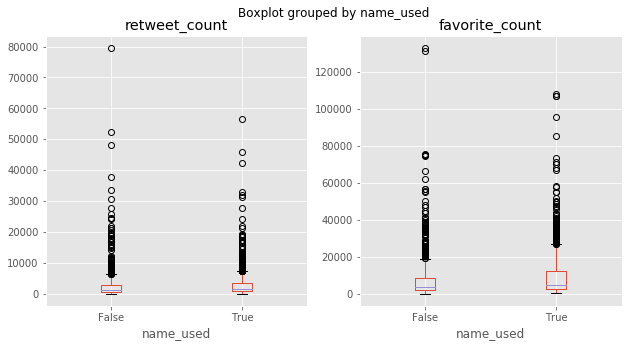

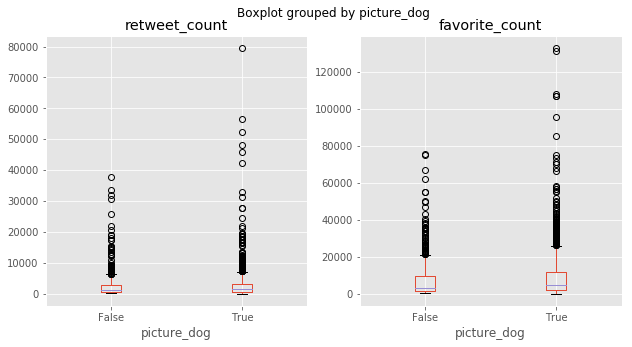

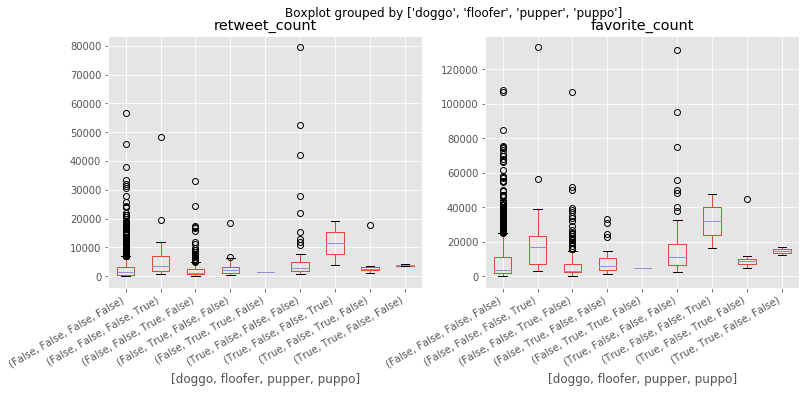

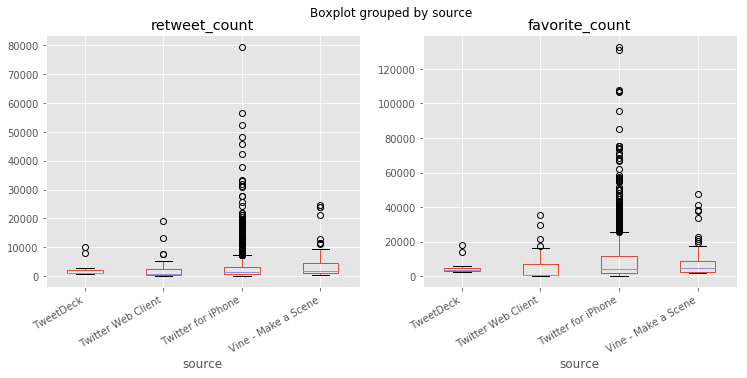

In [318]:
fig, axs = plt.subplots(1,2,figsize=(10,  5))
archive_clean.boxplot(['retweet_count','favorite_count'], 'name_used', axs)
### trend not particularly pronounced, although more favorites when dog named, and possibly more retweets

fig, axs = plt.subplots(1,2,figsize=(10,  5))
archive_clean.boxplot(['retweet_count','favorite_count'], 'picture_dog', axs)
### possibly more likes and more retweets if picture seems to be of a dog; unclear

fig, axs = plt.subplots(1,2,figsize=(12,  5))
archive_clean.boxplot(['retweet_count','favorite_count'], ["doggo","floofer","pupper","puppo"], axs)
fig.autofmt_xdate()
### there generally appear to be more likes and retweets when names for dog stages are used, 
### although may depend on stage, and data relatively sparse

fig, axs = plt.subplots(1,2,figsize=(12,  5))
archive_clean.boxplot(['retweet_count','favorite_count'], 'source', axs)
fig.autofmt_xdate()
### there is no noticeable difference depending on tweet source

### Time Series

* likes and retweets over time
* ratings over time
* likes and retweets by time of day

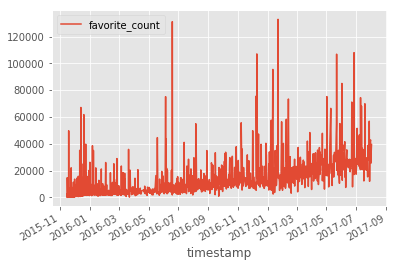

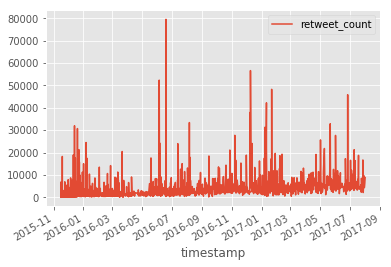

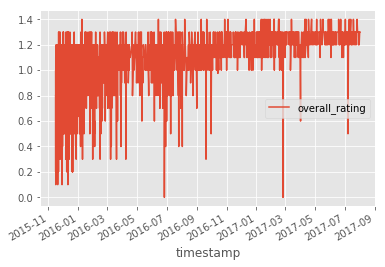

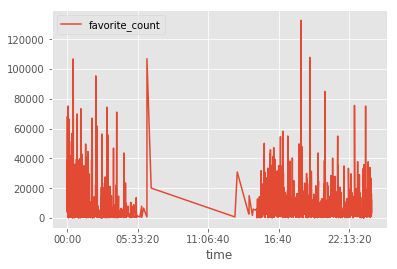

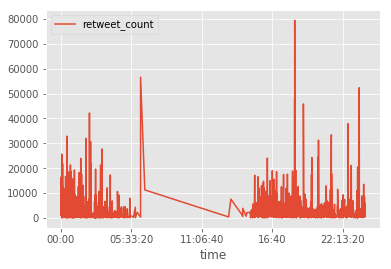

In [319]:
archive_clean.plot("timestamp", "favorite_count")
fig.autofmt_xdate()

archive_clean.plot("timestamp", "retweet_count")
fig.autofmt_xdate()
### favorites clearly increased over time; retweets may have increased slightly

archive_clean[archive_clean.overall_rating<10].plot('timestamp', 'overall_rating')
fig.autofmt_xdate()
### after filtering out unusually high ratings, ratings have clearly increased over time

archive_clean.plot('time', y='favorite_count')
fig.autofmt_xdate()

archive_clean.plot('time', y='retweet_count')
fig.autofmt_xdate()
### tweeter is presumably in the US; this is UTC time.  They do not tweet at night.
### retweets and favorites may be somewhat higher in the morning and evening, but this is not as interesting.

### Bar Plots

* likes and retweets by dog breed
* ratings by dog breed

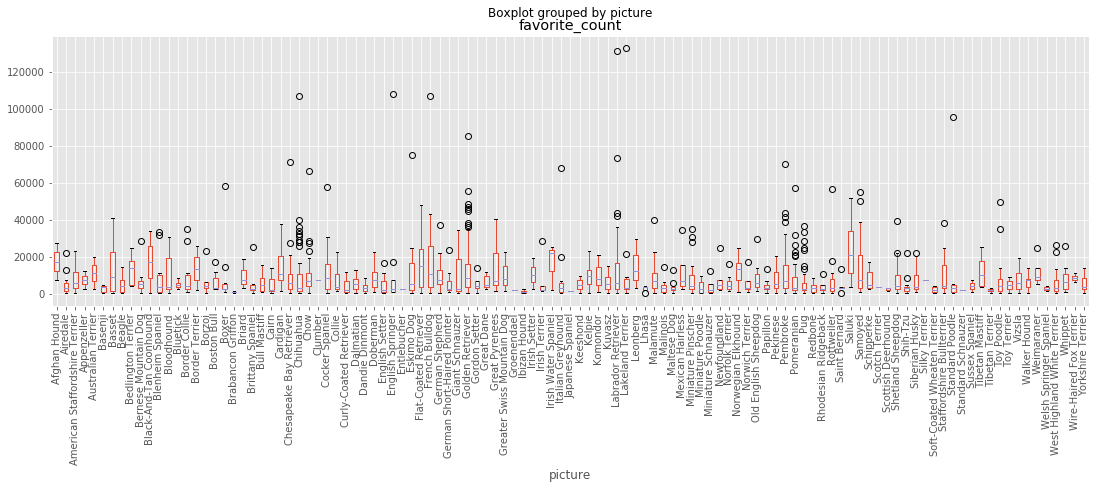

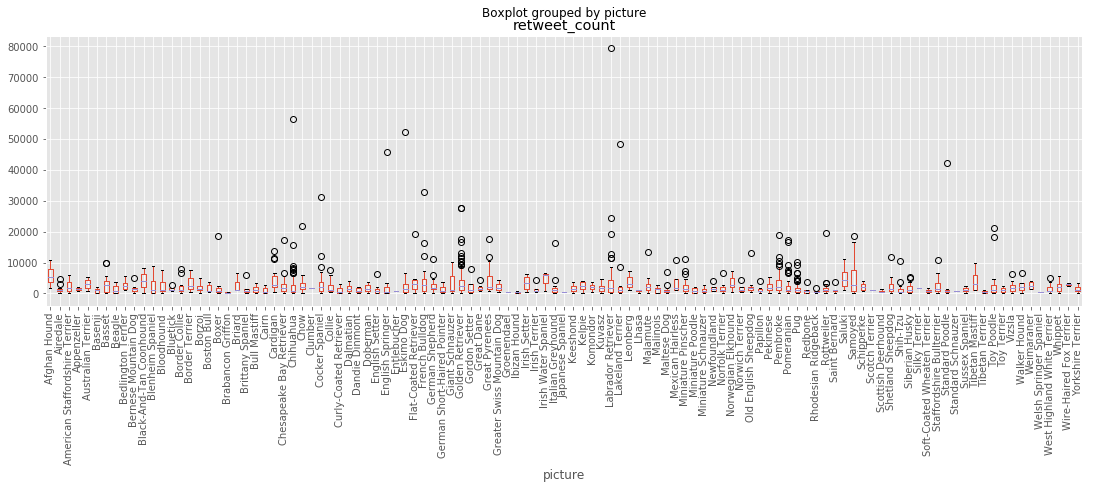

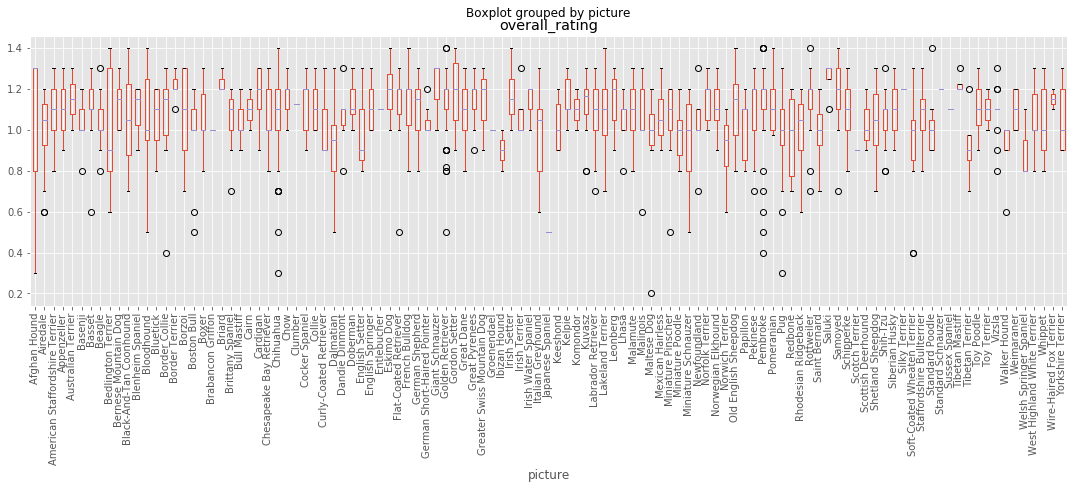

In [320]:
archive_clean[archive_clean.picture_dog==True].boxplot('favorite_count', 'picture', figsize=(18,  5), rot=90)

archive_clean[archive_clean.picture_dog==True].boxplot('retweet_count', 'picture', figsize=(18,  5), rot=90)
### there are differences between dogs, but it's not clear if they are particularly significant
### in any case, it may be worth seeing which dogs are most highly rated in a sorted bar plot

archive_clean[archive_clean.picture_dog==True].boxplot('overall_rating', 'picture', figsize=(18,  5), rot=90)

### Scatterplots

* effect of dog breed confidence on likes and ratings
* likes and retweets by dog rating

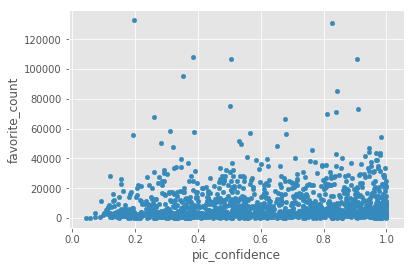

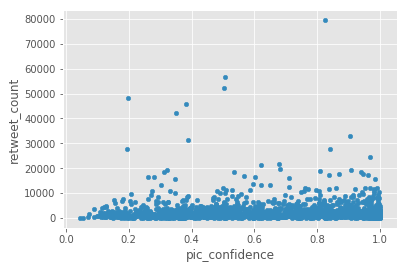

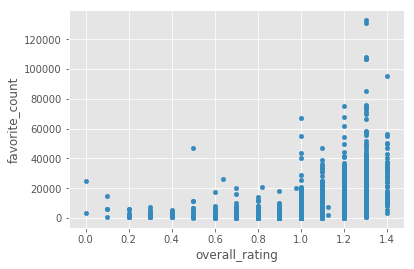

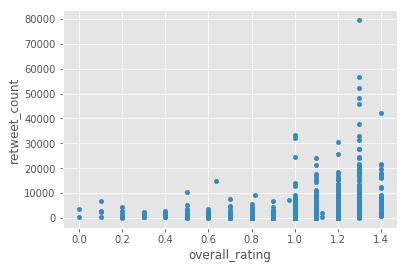

In [321]:
archive_clean[archive_clean.picture_dog==True].plot.scatter(x="pic_confidence", y="favorite_count")

archive_clean[archive_clean.picture_dog==True].plot.scatter(x="pic_confidence", y="retweet_count")

## higher confidence in picture being of dog may increase favorites and retweets

archive_clean[archive_clean.overall_rating<10].plot.scatter(x="overall_rating", y="favorite_count")

archive_clean[archive_clean.overall_rating<10].plot.scatter(x="overall_rating", y="retweet_count")

### the higher the rating, the more retweets and favorites, although this may be confounded by time
### there may also be more retweets and favorites when there is more confidence that a dog is pictured

# Final Plots

### Favorites, Retweets, and Ratings by Dog Stage

Text(0.5,1,'Favorites by Dog Stage')

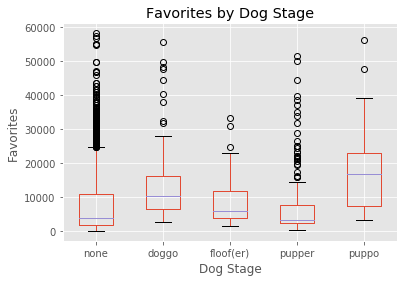

In [322]:
plt.clf()

# filter out outlier favorite counts beyond 60,000; otherwise make sure columns have values only if label is in tweet
favorites = pd.DataFrame({"none": archive_clean[(archive_clean.doggo=="False") &
                                                (archive_clean.floofer=="False") &
                                                (archive_clean.pupper=="False") &
                                                (archive_clean.puppo=="False") &
                                                (archive_clean.favorite_count<60000)].favorite_count,
                          "doggo": archive_clean[(archive_clean.doggo=="True") &
                                                 (archive_clean.favorite_count<60000)].favorite_count,
                          "floof(er)": archive_clean[(archive_clean.floofer=="True") &
                                                     (archive_clean.favorite_count<60000)].favorite_count,
                          "pupper": archive_clean[(archive_clean.pupper=="True") &
                                                  (archive_clean.favorite_count<60000)].favorite_count,
                          "puppo": archive_clean[(archive_clean.puppo=="True") &
                                                 (archive_clean.favorite_count<60000)].favorite_count})

fig = favorites.boxplot()
fig.set_ylabel("Favorites")
fig.set_xlabel("Dog Stage")
fig.set_title("Favorites by Dog Stage")
# plt.savefig('plots/stage_favorites.png', bbox_inches='tight')

Text(0.5,1,'Retweets by Dog Stage')

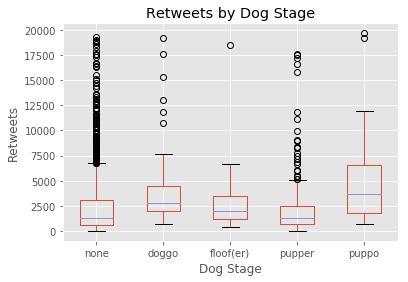

In [323]:
plt.clf()

# filter out outlier retweet counts beyond 20,000
retweets = pd.DataFrame({"none": archive_clean[(archive_clean.doggo=="False") &
                                                (archive_clean.floofer=="False") &
                                                (archive_clean.pupper=="False") &
                                                (archive_clean.puppo=="False") &
                                                (archive_clean.retweet_count<20000)].retweet_count,
                          "doggo": archive_clean[(archive_clean.doggo=="True") &
                                                 (archive_clean.retweet_count<20000)].retweet_count,
                          "floof(er)": archive_clean[(archive_clean.floofer=="True") &
                                                     (archive_clean.retweet_count<20000)].retweet_count,
                          "pupper": archive_clean[(archive_clean.pupper=="True") &
                                                  (archive_clean.retweet_count<20000)].retweet_count,
                          "puppo": archive_clean[(archive_clean.puppo=="True") &
                                                 (archive_clean.retweet_count<20000)].retweet_count})

fig = retweets.boxplot()
fig.set_ylabel("Retweets")
fig.set_xlabel("Dog Stage")
fig.set_title("Retweets by Dog Stage")
# plt.savefig('plots/stage_retweets.png', bbox_inches='tight')

Text(0.5,1,'Ratings by Dog Stage')

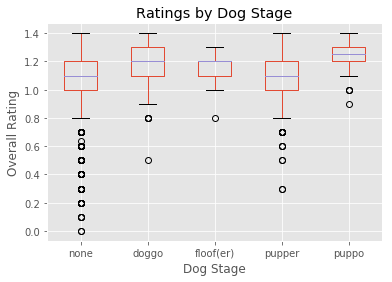

In [324]:
plt.clf()

# filter out outlier overall dog ratings beyond 10
ratings = pd.DataFrame({"none": archive_clean[(archive_clean.doggo=="False") &
                                                (archive_clean.floofer=="False") &
                                                (archive_clean.pupper=="False") &
                                                (archive_clean.puppo=="False") &
                                                (archive_clean.overall_rating<10)].overall_rating,
                          "doggo": archive_clean[(archive_clean.doggo=="True") &
                                                 (archive_clean.overall_rating<10)].overall_rating,
                          "floof(er)": archive_clean[(archive_clean.floofer=="True") &
                                                     (archive_clean.overall_rating<10)].overall_rating,
                          "pupper": archive_clean[(archive_clean.pupper=="True") &
                                                  (archive_clean.overall_rating<10)].overall_rating,
                          "puppo": archive_clean[(archive_clean.puppo=="True") &
                                                 (archive_clean.overall_rating<10)].overall_rating})

fig = ratings.boxplot()
fig.set_ylabel("Overall Rating")
fig.set_xlabel("Dog Stage")
fig.set_title("Ratings by Dog Stage")
# plt.savefig('plots/stage_ratings.png', bbox_inches='tight')

### Favorites, Retweets, and Ratings over Time

<Figure size 432x288 with 0 Axes>

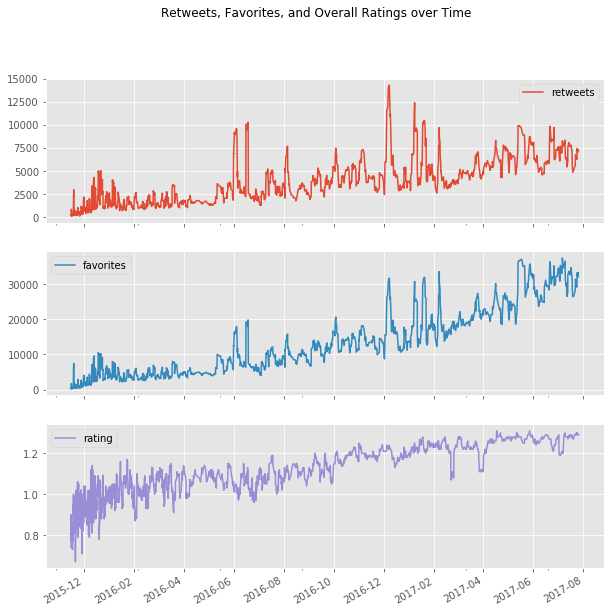

In [325]:
plt.clf()

# make time stamp index
temp = archive_clean[archive_clean.overall_rating<10][["timestamp",
                                                       "retweet_count",
                                                       "favorite_count",
                                                       "overall_rating"]].set_index("timestamp").rename_axis(None)

# average out retweets, favorites, and ratings over 10 instances, to get a smoother line
time = pd.DataFrame({"retweets": temp.retweet_count.rolling(10).mean(), 
                     "favorites": temp.favorite_count.rolling(10).mean(),
                     "rating": temp.overall_rating.rolling(10).mean()})

fig = time.plot(subplots=True, figsize=(10,10), title="Retweets, Favorites, and Overall Ratings over Time")
# plt.savefig('plots/time.png', bbox_inches='tight')

### Favorites, Retweets, and Ratings by Dog Breed

<Figure size 432x288 with 0 Axes>

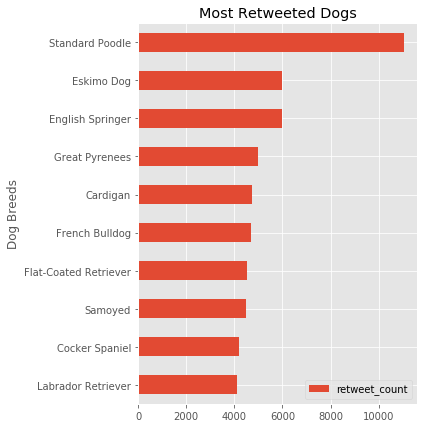

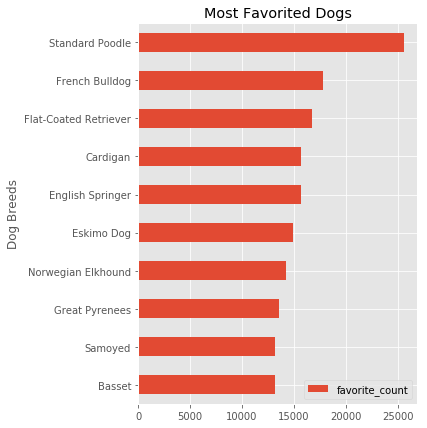

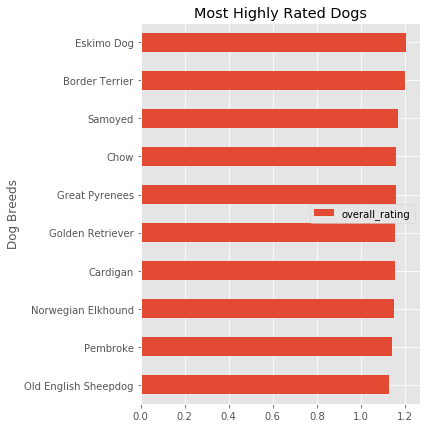

In [331]:
plt.clf()

# see which dog breeds were mentioned more than 5 times, to decrease influence of one-time high/low ratings
multiple_posts = archive_clean[archive_clean.picture_dog==True].groupby('picture')['tweet_id'].count()
multiple_posts = list(multiple_posts[multiple_posts>5].reset_index().picture)

# filter out outlier high ratings, non-dogs, very low picture confience, and dog breeds infrequently mentioned
dog_breed = archive_clean[(archive_clean.picture_dog==True) & 
              (archive_clean.overall_rating<10) &
              (archive_clean.picture.isin(multiple_posts)) &
              (archive_clean.pic_confidence>0.3)].groupby('picture')["retweet_count"].mean().reset_index().sort_values('retweet_count', ascending=True).set_index('picture')
fig = dog_breed.tail(10).plot.barh(figsize=(5,7))
fig.set_ylabel("Dog Breeds")
fig.set_title("Most Retweeted Dogs")
# plt.savefig('plots/retweeted_dogs.png', bbox_inches='tight')

dog_breed = archive_clean[(archive_clean.picture_dog==True) & 
              (archive_clean.overall_rating<10) &
              (archive_clean.picture.isin(multiple_posts)) &
              (archive_clean.pic_confidence>0.3)].groupby('picture')["favorite_count"].mean().reset_index().sort_values('favorite_count', ascending=True).set_index('picture')
fig = dog_breed.tail(10).head(10).plot.barh(figsize=(5,7))
fig.set_ylabel("Dog Breeds")
fig.set_title("Most Favorited Dogs")
# plt.savefig('plots/favorited_dogs.png', bbox_inches='tight')

dog_breed = archive_clean[(archive_clean.picture_dog==True) & 
              (archive_clean.overall_rating<10) &
              (archive_clean.picture.isin(multiple_posts)) &
              (archive_clean.pic_confidence>0.3)].groupby('picture')["overall_rating"].mean().reset_index().sort_values('overall_rating', ascending=True).set_index('picture')
fig = dog_breed.tail(10).head(10).plot.barh(figsize=(5,7))
fig.set_ylabel("Dog Breeds")
fig.set_title("Most Highly Rated Dogs")
# plt.savefig('plots/rated_dogs.png', bbox_inches='tight')


### Favorites and Retweets by Dog Rating

/Users/eskrav/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5,1,'Favorites by Dog Rating')

<Figure size 432x288 with 0 Axes>

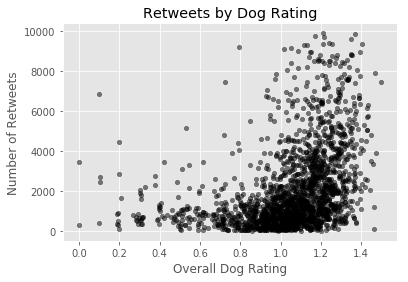

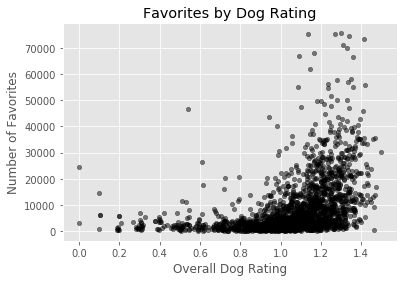

In [327]:
plt.clf()

dog_rating = archive_clean[["overall_rating","retweet_count","favorite_count"]]

#add some jitter to dog ratings
noise = np.random.normal(1, 0.05, len(dog_rating.overall_rating))
dog_rating.overall_rating = dog_rating.overall_rating * noise

# filter out outlier high ratings, outlier high retweets - make it difficult to see relationship
fig = dog_rating[(dog_rating.overall_rating<10) &
           (dog_rating.retweet_count<10000)].plot.scatter("overall_rating", 
                   "retweet_count", alpha=0.5, color="black")
fig.set_xlabel("Overall Dog Rating")
fig.set_ylabel("Number of Retweets")
fig.set_title("Retweets by Dog Rating")
# plt.savefig('plots/retweets_rating.png', bbox_inches='tight')

# filter out outlier high ratings, outlier high favorites
fig = dog_rating[(dog_rating.overall_rating<10) &
           (dog_rating.favorite_count<80000)].plot.scatter("overall_rating", 
                   "favorite_count", alpha=0.5, color="black")
fig.set_xlabel("Overall Dog Rating")
fig.set_ylabel("Number of Favorites")
fig.set_title("Favorites by Dog Rating")
# plt.savefig('plots/favorites_rating.png', bbox_inches='tight')